In [1]:
import itertools
import os
import collections
import sys
import traceback
import matplotlib
import numpy as np
import re
import glypy
from glypy import monosaccharides, glycans, motifs
from glypy.composition import Composition, composition_transform, glycan_composition
from glypy.structure import (glycan, monosaccharide, substituent,
                              Anomer, Configuration, SuperClass,
                              Substituent, Glycan, Monosaccharide,
                              crossring_fragments)
from glypy.io.nomenclature import identity
from glypy.io import glycoct, glycomedb, iupac
from glypy import plot
from glypy.algorithms import subtree_search, similarity, database
from glypy import tests
%matplotlib inline
from IPython.display import set_matplotlib_formats, display

set_matplotlib_formats("svg")

import logging
logging.basicConfig(level="DEBUG")
from matplotlib import pyplot as plt
from matplotlib import transforms

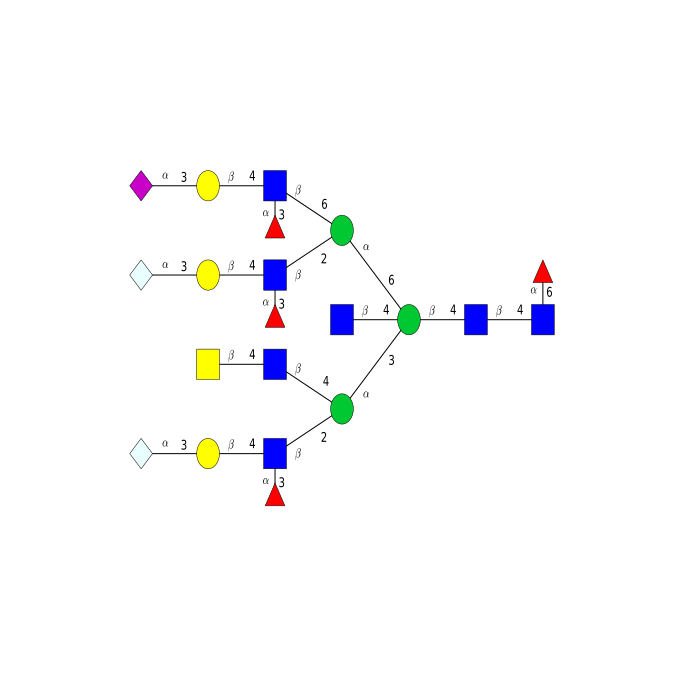

In [2]:
dt, ax = plot.plot(tests.load("complex_glycan"), layout='balanced', orientation='h', label=True, fontsize=6)
#dt.transform(transforms.Affine2D().scale(3))
#ax.set_ylim(2.5 * i for i in ax.get_ylim())
#ax.set_xlim(2.5 * i for i in ax.get_xlim())
fig = ax.get_figure()
fig.set_figwidth(12)
fig.set_figheight(12)
ax.autoscale_view()

In [ ]:
%debug

dt, ax = plot.plot(tests.load("complex_glycan"), orientation="h")
dt.transform(matplotlib.transforms.Affine2D().scale(4))
fig = ax.get_figure()

minx, maxx, miny, maxy = dt.extrema()
print minx, maxx, miny, maxy
ax.set_xlim(minx - 5, maxx + 5)
ax.set_ylim(miny - 5, maxy + 5)

In [ ]:
sx = 1.2
sy = 1.2

dt, ax = plot.plot(tests.load("complex_glycan"), layout='balanced', orientation='v', label=True, fontsize=7)
#dt.transform(matplotlib.transforms.Affine2D().scale(1, 1.5))
#ax.set_xlim((i * sx for i in ax.get_xlim()))
#ax.set_ylim((i * sy for i in ax.get_ylim()))

#display(ax.get_figure())

#for nodes, text_maps in (dt.data['text']).items():
#    for text_bunch in text_maps['linkage']:
#        parent_patch = dt.data['patches'][nodes[0]]
#        child_patch = dt.data["patches"][nodes[1]]
#        for text in text_bunch:
#            bb_patch = text.get_position(), text.get_window_extent()
#            print bb_patch


#fig = ax.get_figure()
#fig.set_figwidth(8)
#fig.set_figheight(8)

#sx = 1
#sy = 1
#dt, ax = plot.plot(tests.load("complex_glycan"), layout='topological', orientation='h', label=True, fontsize=7)
#dt.transform(matplotlib.transforms.Affine2D().scale(sx, sy))

#ax.set_xlim((i * sx for i in ax.get_xlim()))
#ax.set_ylim((i * sy for i in ax.get_ylim()))


In [8]:
from glypy import enzymes

In [9]:
enz = enzymes.Glycosyltransferase(3, 1, Anomer.beta, monosaccharides.GlcNAc, monosaccharides.GlcNAc)

In [10]:
g = Glycan(monosaccharides.GlcNAc)

RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n
RES
1b:b-dglc-HEX-1:5
2s:n-acetyl
3b:b-dglc-HEX-1:5
4s:n-acetyl
5b:b-dglc-HEX-1:5
6s:n-acetyl
LIN
1:1d(2+1)2n
2:1o(3+1)3d
3:3d(2+1)4n
4:3o(3+1)5d
5:5d(2+1)6n



(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=99511613456305958630027032455707903233  x=0.0 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0xc3fb9b0>)

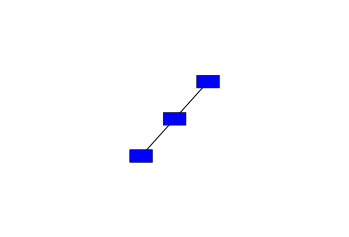

In [12]:
for x in enz.traverse(g):
    print x
    enz.apply(x)
print g
plot.plot(g, layout='topological')

In [13]:
ase = enzymes.Glycosidase(3, 1, anomer=Anomer.beta, parent=None, child=monosaccharides.GlcNAc)

In [15]:
for x in ase.traverse(g):
    ase.apply(x)

(RES 1b:b-dglc-HEX-1:5 2s:n-acetyl LIN 1:1d(2+1)2n: id=99511613456305958630027032455707903233  x=0.0 mod=0,
 <matplotlib.axes._subplots.AxesSubplot at 0xc3f0e80>)

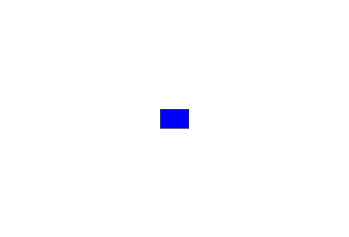

In [16]:
plot.plot(g)